# Homework 2 Setup

In [1]:
import sys
sys.path.append('/Users/jonathancontreras/Desktop/College Folder/Senior Year/Math485/Unit 1 Tabular')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import dhs_util
from dhs_util import *

os.chdir('/Users/jonathancontreras/Desktop/College Folder/Senior Year/Math485/Unit 1 Tabular')
df = pd.read_csv('dhs_service_records_synthesized_final.csv')
df = dhs_preprocessing(df)
df, service_map = add_service_label(df)
df = add_age_bin(df)


In [3]:
service_map

{'Children_Attending_Early_Childhood_Programs_Managed_by_DHS': 'S01',
 'Children_in_Care': 'S02',
 'Children_Receiving_Child_Welfare_Services': 'S03',
 'Children_Receiving_DHS_Funded_Out_of_School_Programs': 'S04',
 'Children_Receiving_Early_Intervention_Services': 'S05',
 'Families_Receiving_Child_Welfare_Services': 'S06',
 'Homeless_Population': 'S07',
 'Homicides': 'S08',
 'Individuals_Receiving_DHS_Services': 'S09',
 'Individuals_Receiving_Family_Strengthening_Programs': 'S10',
 'Individuals_Receiving_Homelessness_and_Housing_Services': 'S11',
 'Individuals_Receiving_Income_Supports': 'S12',
 'Individuals_Receiving_Intellectual_Disability_Services': 'S13',
 'Individuals_Receiving_Mental_Health_Services': 'S14',
 'Individuals_Receiving_Substance_Use_Disorder_Services': 'S15',
 'Involuntary_Commitments': 'S16',
 'Jail_Population': 'S17',
 'Mental_Health_Crises': 'S18',
 'Older_Adults_Receiving_Services': 'S19',
 'Overdoses': 'S20',
 'Parents_Receiving_Child_Welfare_Services': 'S21',


Let's analyze the cohort of receiving homelessness and housing services (S11) and children receiving child welfare services (S18) to investigate the homeless children population receiving services.

In [4]:
df.head(10)

,id,date,service,age,gender,race,ethnicity,marital,education,month,serv,age_bin
0,1626,2021-01-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),January,S01,0-9
1,1626,2021-02-28,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),February,S01,0-9
2,1626,2021-03-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),March,S01,0-9
3,1626,2021-04-30,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),April,S01,0-9
4,1626,2021-05-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),May,S01,0-9
5,1626,2021-06-30,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,1~White,99~Unknown,99~Unknown,9-12~High School (grade 9-12),June,S01,0-9
6,3775,2021-01-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,99~Unknown,99~Unknown,99~Unknown,99~Unknown,January,S01,0-9
7,3775,2021-02-28,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,99~Unknown,99~Unknown,99~Unknown,99~Unknown,February,S01,0-9
8,3775,2021-03-31,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,99~Unknown,99~Unknown,99~Unknown,99~Unknown,March,S01,0-9
9,3775,2021-04-30,Children_Attending_Early_Childhood_Programs_Ma...,5,1~Male,99~Unknown,99~Unknown,99~Unknown,99~Unknown,April,S01,0-9


In [5]:
recipient = get_recipient_attribute(df)
id_s11 =df.query("serv == 'S11'").id.unique() #find number of id that used S11
id_one_serv = recipient.query("distinct_service == 1").id.unique() #find number of id that used 1 service only
id_s11_only = list(set(id_s11) & set(id_one_serv)) # find number of id that only used S11 and no other service
id_comp_s11_only = set(id_s11).difference(set(id_s11_only)) #find compliment of S11 only

id_s3 =df.query("serv == 'S03'").id.unique() 
id_s3_only = list(set(id_s3) & set(id_one_serv)) 
id_comp_s3_only = set(id_s3).difference(set(id_s3_only)) 

id_both_s11_s3 = list(set(id_s11) & set(id_s3)) #find number of both s3 and s11 users

In [6]:
recipient.head()

,id,num_service,distinct_service,first_date,last_date,num_month,distinct_month,age,gender,race,ethnicity,marital,education,serv,age_bin
0,1,12,1,2021-01-31,2021-12-31,12,12,13,1~Male,99~Unknown,2~Not Hispanic/Latinx,99~Unknown,GED~High School Diploma/GED Completed,S12,10-19
12,2,1,1,2021-02-28,2021-02-28,1,1,70,2~Female,1~White,2~Not Hispanic/Latinx,2~Married,99~Unknown,S12,70-79
13,3,11,1,2021-02-28,2021-12-31,11,11,29,2~Female,1~White,2~Not Hispanic/Latinx,2~Married,9-12~High School (grade 9-12),S12,20-29
24,4,4,1,2021-03-31,2021-12-31,4,4,4,2~Female,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12),S12,0-9
28,5,12,1,2021-01-31,2021-12-31,12,12,40,1~Male,2~Black/African American,2~Not Hispanic/Latinx,2~Married,UNDERGRAD~Some College,S12,40-49


In [7]:
df.id.nunique(), len(id_one_serv), len(id_s3_only), len(id_s3), len(id_s3_only)+len(id_comp_s3_only)

(533799, 424468, 499, 7306, 7306)

In [8]:
df.id.nunique(), len(id_one_serv), len(id_s11_only), len(id_s11), len(id_s11_only)+len(id_comp_s11_only)

(533799, 424468, 3034, 21823, 21823)

In [9]:
cohort1 = pd.DataFrame(zip(id_s11_only, ['S11_only']*len(id_s11_only)),columns=['id','cohort'])
cohort2 = pd.DataFrame(zip(id_comp_s11_only, ['S11']*len(id_comp_s11_only)),columns=['id','cohort'])
cohort3 = pd.DataFrame(zip(id_s3_only, ['S3_only']*len(id_s3_only)),columns=['id','cohort'])
cohort4 = pd.DataFrame(zip(id_comp_s3_only, ['S3']*len(id_comp_s3_only)),columns=['id','cohort'])
cohort5 = pd.DataFrame(zip(id_both_s11_s3, ['S3 and S11']*len(id_both_s11_s3)),columns=['id','cohort'])
cohort_all=pd.concat([cohort1,cohort2,cohort3,cohort4,cohort5],axis=0)

In [10]:
cohort_all.groupby('cohort').id.nunique()
df1 = df.merge(cohort_all, on=['id'], how='inner')

In [11]:
df1.groupby('cohort').nunique()

,id,date,service,age,gender,race,ethnicity,marital,education,month,serv,age_bin
cohort,,,,,,,,,,,,
S11,18789,12,22,105,3,7,3,7,8,12,22,11
S11_only,3034,12,1,86,3,7,3,7,8,12,1,9
S3,6807,12,21,23,3,6,3,7,8,12,21,3
S3 and S11,511,12,17,21,2,5,3,5,8,12,17,3
S3_only,499,12,1,20,2,5,3,6,8,12,1,3


In [12]:
recipient_w_cohort = recipient.merge(cohort_all, on='id', how='inner')
recipient_w_cohort.head()

,id,num_service,distinct_service,first_date,last_date,num_month,distinct_month,age,gender,race,ethnicity,marital,education,serv,age_bin,cohort
0,6,24,3,2021-01-31,2021-12-31,24,12,71,2~Female,2~Black/African American,2~Not Hispanic/Latinx,1~Single-Never Married,99~Unknown,S09,70-79,S11
1,10,24,2,2021-01-31,2021-12-31,24,12,23,1~Male,2~Black/African American,2~Not Hispanic/Latinx,3~Single-Divorced,9-12~High School (grade 9-12),S11,20-29,S11
2,20,8,2,2021-01-31,2021-12-31,8,8,2,2~Female,99~Unknown,2~Not Hispanic/Latinx,1~Single-Never Married,9-12~High School (grade 9-12),S03,0-9,S3
3,47,36,4,2021-01-31,2021-12-31,36,12,8,2~Female,2~Black/African American,2~Not Hispanic/Latinx,1~Single-Never Married,99~Unknown,S09,0-9,S11
4,49,24,2,2021-01-31,2021-12-31,24,12,41,2~Female,1~White,2~Not Hispanic/Latinx,1~Single-Never Married,UNDERGRAD~Some College,S11,40-49,S11


In [13]:
print(recipient_w_cohort.columns)

Index(['id', 'num_service', 'distinct_service', 'first_date', 'last_date',
       'num_month', 'distinct_month', 'age', 'gender', 'race', 'ethnicity',
       'marital', 'education', 'serv', 'age_bin', 'cohort'],
      dtype='object')


/Users/jonathancontreras/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


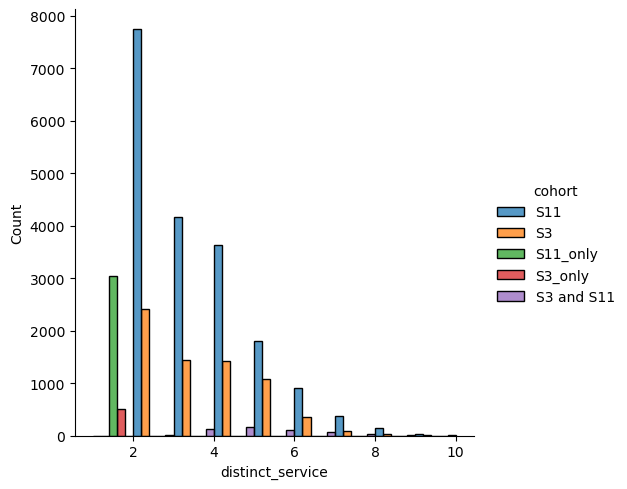

In [14]:
sns.displot(recipient_w_cohort, x="distinct_service", hue = "cohort", multiple="dodge", binwidth = 1, linewidth=1 )


/Users/jonathancontreras/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


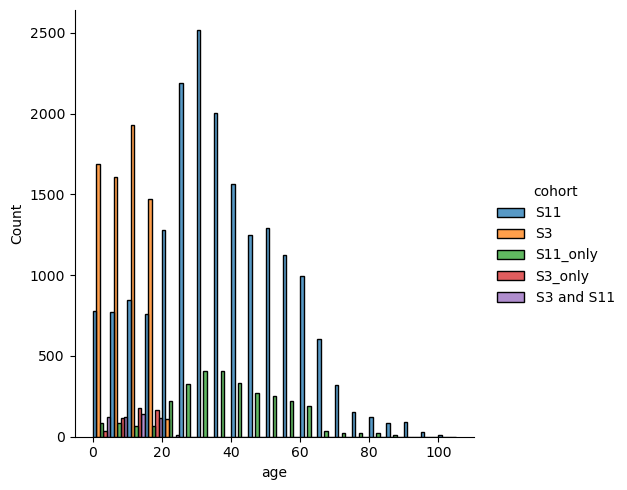

In [15]:
sns.displot(recipient_w_cohort, x="age", hue = "cohort", multiple="dodge", binwidth = 5, linewidth=1 )


/Users/jonathancontreras/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


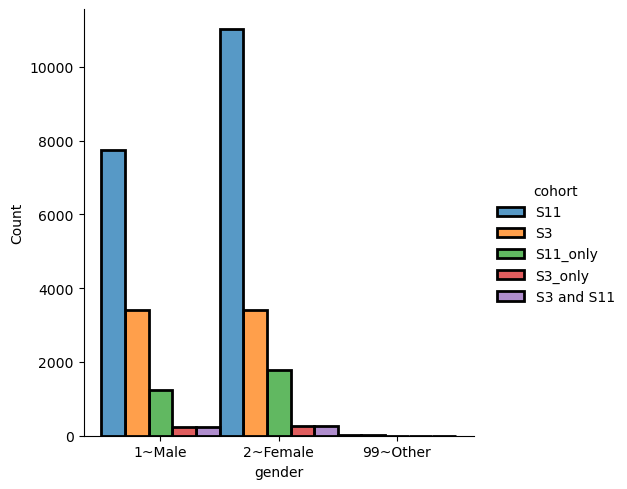

In [16]:
sns.displot(recipient_w_cohort, x="gender", hue = "cohort", multiple="dodge", binwidth = 1, linewidth=2 )


/Users/jonathancontreras/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '1~White'),
  Text(1, 0, '2~Black/African American'),
  Text(2, 0, '4~Asian'),
  Text(3, 0, '5~Native American/Pacific Islander'),
  Text(4, 0, '6~Two or More Races'),
  Text(5, 0, '7~Other Single Race'),
  Text(6, 0, '99~Unknown')])

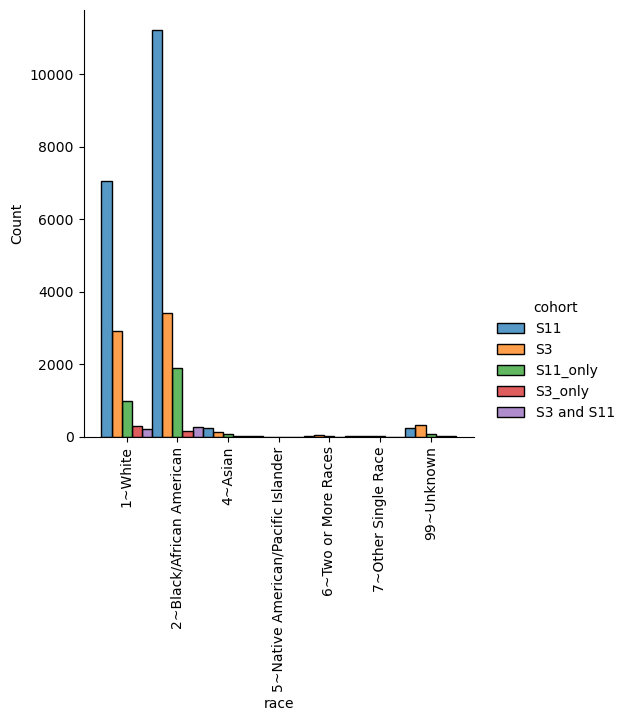

In [17]:
sns.displot(recipient_w_cohort, x="race", hue = "cohort", multiple="dodge", binwidth = 1, linewidth=1 )
plt.xticks(rotation=90)


# Conclusion

The 4th and 3rd graphs show, demographically, that about 70% more (~3,000) Black/African American recipients receive homelessness and housing services than White recipients, whereas the number of children receiving welfare are about equal among the two cohorts. Similarly, there are about 60% more females than males receiving homelessness and housing services whereas the gender proportion between those receiving children's welfare is about the same. 

Also, as displayed in the 1st graph, a large proportion of individuals who receive services for homelessness and housing only receive one other service, which begs the question of which service(s) this might be. Perhaps in the future I would analyze what other services are S11 recipients receiving and maybe visualize it with a graph or pie chart. 
